In [233]:
!pip install --upgrade --quiet numpy pandas matplotlib apafib scikit-learn seaborn missingno statsmodels yellowbrick

# Problema 6 ¿Quieres saber cuanto vale tu coche?

 El estimar el precio de un coche usado es algo complejo y depende de muchos factores. Vamos
 a trabajar con un conjunto de datos sobre características de coches usados (fabricante, modelo,
 estado, costes...) que las asocia con el precio al que se vendieron.
 Puedes obtener este conjunto de datos mediante la función load_car_sales de la librería
 apafib esta retornará un dataframe de Pandas. Resuelve los siguientes apartados ilustrando
 los resultados de la manera que te parezca más adecuada.

Para empezar vamos a cargar el dataset y ver sus características principales.

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

try: 
    from apafib import load_car_sales
    car_sales = load_car_sales()
except:
    print("Error al cargar el dataset")
    
car_sales
    

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Inspection rating,Tires quality,Interior condition,Comfort level,Sound system quality,Model reviews score,Overall rating,Independent rating,Insurance cost,Maintenance cost
0,Toyota,RAV4,2.4,Hybrid,2020.0,21317.0,68597,10.0,7.6,8.8,7.0,8.2,7.8,8.2,10.0,800.0,300.0000
1,Ford,Focus,1.8,Petrol,2018.0,22500.0,35276,10.0,7.6,7.3,5.3,4.4,5.5,5.9,6.6,800.0,127.9000
2,Ford,Mondeo,1.6,Diesel,2013.0,79521.0,17370,10.0,8.0,7.6,5.9,4.3,3.9,6.2,6.2,800.0,123.3054
3,Toyota,Yaris,1.2,Petrol,2003.0,159534.0,3213,10.0,7.5,5.4,6.5,7.9,NaN,7.7,NaN,800.0,131.0276
4,Ford,Mondeo,1.4,Diesel,2000.0,126511.0,4832,10.0,8.0,5.4,4.9,4.9,NaN,5.5,7.1,800.0,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,BMW,X3,2.4,Diesel,NaN,243446.0,1217,10.0,7.2,5.4,5.0,3.6,4.5,5.9,7.3,800.0,100.0000
746,Ford,Fiesta,1.0,Petrol,2016.0,39821.0,14359,10.0,6.9,7.1,NaN,5.1,5.9,6.7,8.0,200.0,NaN
747,Ford,Mondeo,1.4,Diesel,2014.0,33693.0,23259,10.0,7.7,6.4,5.9,5.5,5.6,6.8,7.7,800.0,142.4866
748,Ford,Fiesta,1.2,Petrol,2011.0,90750.0,8066,10.0,7.2,6.6,6.9,6.5,5.8,8.1,9.9,200.0,100.0000


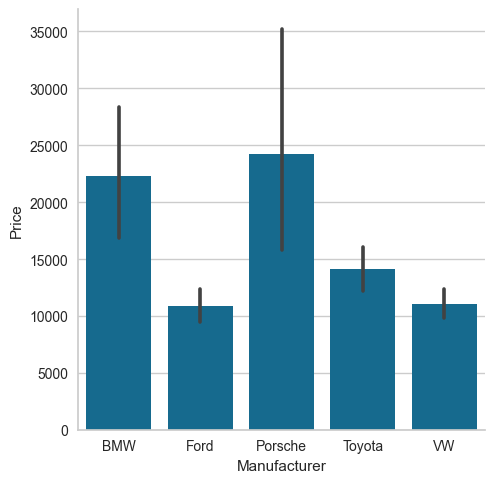

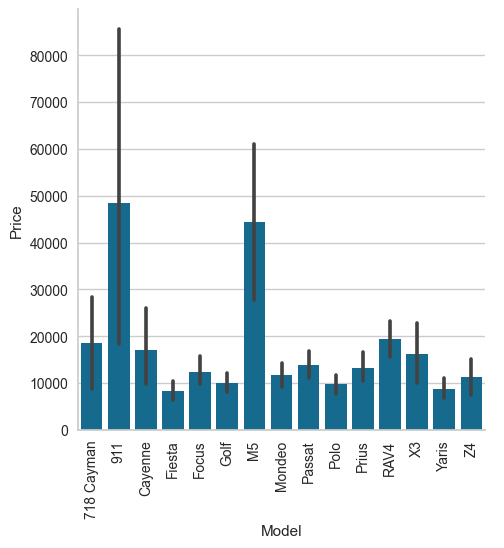

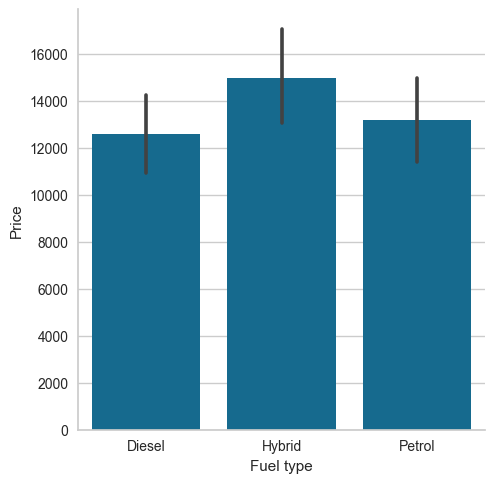

In [235]:
# Podemos ver que en dataset solo hay 5 marcas de coches [BMW, Ford, Porsche, Toyota, VW]
g = sns.catplot(data=car_sales, kind="bar", x="Manufacturer", y="Price")

h = sns.catplot(data=car_sales, kind="bar", x="Model", y="Price")
j = sns.catplot(data=car_sales, kind="bar", x="Fuel type", y="Price")

h.tick_params(axis='x', rotation=90)


<Axes: >

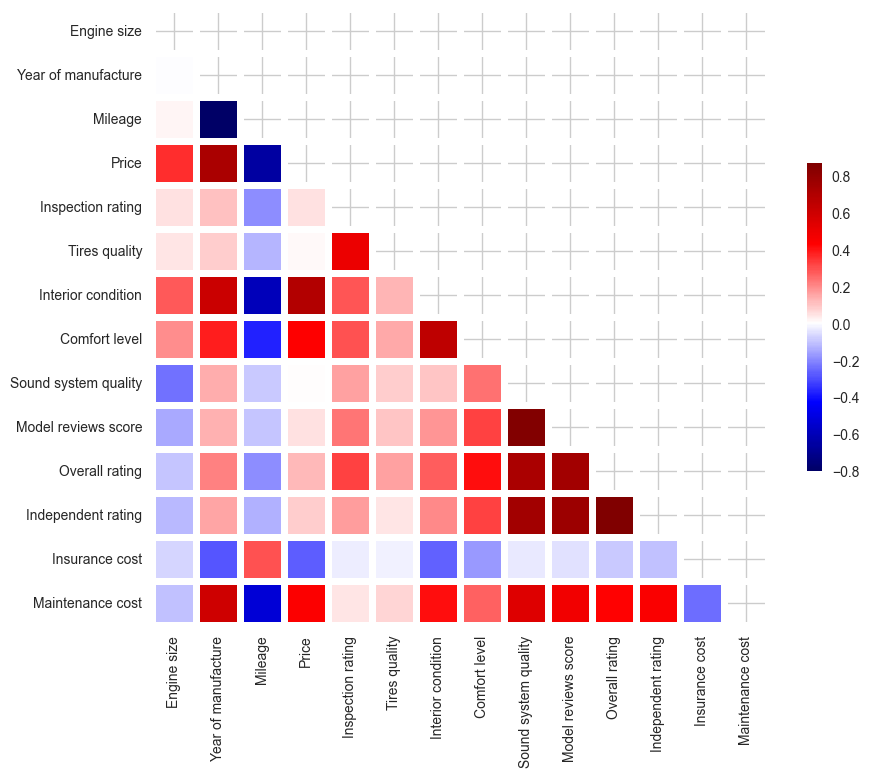

In [236]:
corr = car_sales.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap='seismic', center=0, square=True, linewidths=5, cbar_kws={"shrink": .5})

a) 
- Divide el conjunto de datos en entrenamiento y test (70%/30%). 
Verás que hay una mezcla de variables continuas y categóricas. 
- Trata adecuadamente las variables categóricas teniendo en cuenta lo que significan. 
- Hay algunos valores perdidos en las variables continuas, impútalos usando el KNNImputer de scikit-learn.  
- Una vez tenemos el conjunto de datos preprocesado puedes aplicar PCA adecuadamente para ver su comportamiento.  Analiza sus resultados y representa la variable objetivo sobre el PCA en dos dimensiones. Explica lo que has observado.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en train/test
car_train, car_test = train_test_split(car_sales, test_size=0.3, random_state=0)
car_train.shape, car_test.shape

# Tratamos las variables categoricas Manufacturer/Model/Fuel type
# Ver la cantidad de missing values
car_train['Manufacturer'].isna().sum(), car_train['Model'].isna().sum(), car_train['Fuel type'].isna().sum()

(np.int64(0), np.int64(0), np.int64(0))

Ahora vamos a hacer el One-Hot encoding (Si tiene las dos columnas a false sabemos que sera Diesel)

In [238]:
dummy = pd.get_dummies(car_train['Fuel type'], drop_first=True, prefix='Fuel type', prefix_sep='_')
dummy

,Fuel type_Hybrid,Fuel type_Petrol
200,False,True
243,True,False
535,False,False
316,True,False
12,False,False
...,...,...
707,False,True
192,True,False
629,False,True
559,False,True


In [239]:
car_train = pd.concat([car_train, dummy], axis=1)
car_train.drop(columns=['Fuel type'], inplace=True)
car_train.head()

,Manufacturer,Model,Engine size,Year of manufacture,Mileage,Price,Inspection rating,Tires quality,Interior condition,Comfort level,Sound system quality,Model reviews score,Overall rating,Independent rating,Insurance cost,Maintenance cost,Fuel type_Hybrid,Fuel type_Petrol
200,Toyota,Yaris,1.0,2012.0,50525.0,11929,10.0,8.2,5.7,5.5,6.3,6.1,8.1,9.5,200.0,300.0000,False,True
243,Toyota,Prius,1.4,2010.0,43037.0,20178,10.0,8.1,7.9,6.3,7.9,6.4,7.9,9.5,800.0,300.0000,True,False
535,Ford,Focus,1.0,2012.0,102621.0,10996,10.0,7.9,5.9,5.8,5.7,6.7,6.8,7.6,800.0,100.0000,False,False
316,Toyota,RAV4,2.0,NaN,94859.0,22947,10.0,7.0,6.4,5.6,6.8,6.8,7.1,9.1,800.0,300.0000,True,False
12,VW,Passat,1.8,1996.0,103099.0,5296,10.0,8.4,5.4,5.1,7.8,7.2,7.4,8.7,800.0,152.2364,False,False


Ahora vamos a tratar con Manufacturer y Model, que tienen muchas categorias diferentes. Para ello, aplicaremos un One-Hot Encoding para convertir estas variables categóricas en variables numéricas.

Podemos tener en cuenta que la variable Model depende de la variable Manufacturer, por lo que podemos considerar eliminar una de las dos para evitar la multicolinealidad. Pero en este caso, vamos a mantener ambas para ver su impacto en el modelo.

In [240]:
dummies = pd.get_dummies(car_train['Model'], drop_first=True, prefix='Model', prefix_sep='_')
# Si todos son false el modelo es un 718 Cayman
dummies

car_train = pd.concat([car_train, dummies], axis=1)
car_train.drop(columns=['Model'], inplace=True)
car_train.head()

,Manufacturer,Engine size,Year of manufacture,Mileage,Price,Inspection rating,Tires quality,Interior condition,Comfort level,Sound system quality,...,Model_Golf,Model_M5,Model_Mondeo,Model_Passat,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4
200,Toyota,1.0,2012.0,50525.0,11929,10.0,8.2,5.7,5.5,6.3,...,False,False,False,False,False,False,False,False,True,False
243,Toyota,1.4,2010.0,43037.0,20178,10.0,8.1,7.9,6.3,7.9,...,False,False,False,False,False,True,False,False,False,False
535,Ford,1.0,2012.0,102621.0,10996,10.0,7.9,5.9,5.8,5.7,...,False,False,False,False,False,False,False,False,False,False
316,Toyota,2.0,NaN,94859.0,22947,10.0,7.0,6.4,5.6,6.8,...,False,False,False,False,False,False,True,False,False,False
12,VW,1.8,1996.0,103099.0,5296,10.0,8.4,5.4,5.1,7.8,...,False,False,False,True,False,False,False,False,False,False


Repetimos lo mismo para los Manufacturer

In [241]:
dummies = pd.get_dummies(car_train['Manufacturer'], drop_first=True, prefix='Manufacturer', prefix_sep='_')
# Si todos son false el manufacturer es BMW
dummies

car_train = pd.concat([car_train, dummies], axis=1)
car_train.drop(columns=['Manufacturer'], inplace=True)
car_train.head()


,Engine size,Year of manufacture,Mileage,Price,Inspection rating,Tires quality,Interior condition,Comfort level,Sound system quality,Model reviews score,...,Model_Polo,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW
200,1.0,2012.0,50525.0,11929,10.0,8.2,5.7,5.5,6.3,6.1,...,False,False,False,False,True,False,False,False,True,False
243,1.4,2010.0,43037.0,20178,10.0,8.1,7.9,6.3,7.9,6.4,...,False,True,False,False,False,False,False,False,True,False
535,1.0,2012.0,102621.0,10996,10.0,7.9,5.9,5.8,5.7,6.7,...,False,False,False,False,False,False,True,False,False,False
316,2.0,NaN,94859.0,22947,10.0,7.0,6.4,5.6,6.8,6.8,...,False,False,True,False,False,False,False,False,True,False
12,1.8,1996.0,103099.0,5296,10.0,8.4,5.4,5.1,7.8,7.2,...,False,False,False,False,False,False,False,False,False,True


Ahora ya tenemos las variables categoricas tratadas (Hemos pasado de  17 variables a 34), vamos a ver los missing values en las variables continuas

In [242]:
car_train.isna().sum()

Engine size             13
Year of manufacture     43
Mileage                 25
Price                    0
Inspection rating        4
Tires quality            3
Interior condition       5
Comfort level           32
Sound system quality    24
Model reviews score     35
Overall rating          22
Independent rating      27
Insurance cost           9
Maintenance cost        24
Fuel type_Hybrid         0
Fuel type_Petrol         0
Model_911                0
Model_Cayenne            0
Model_Fiesta             0
Model_Focus              0
Model_Golf               0
Model_M5                 0
Model_Mondeo             0
Model_Passat             0
Model_Polo               0
Model_Prius              0
Model_RAV4               0
Model_X3                 0
Model_Yaris              0
Model_Z4                 0
Manufacturer_Ford        0
Manufacturer_Porsche     0
Manufacturer_Toyota      0
Manufacturer_VW          0
dtype: int64

Podemos ver que hay missing values en todas las variables menos precio. Ahora vamos a imputar estos valores usando KNNImputer de scikit-learn.

In [243]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)

# Separar la variable Price antes de imputar
price_column = car_train['Price']

# Eliminar la variable respuesta del conjunto de datos
data = car_train.drop(columns='Price')

# Imputar todas las variables numéricas
car_train_imputed = imputer.fit_transform(data)

# Convertir de nuevo a DataFrame manteniendo los nombres de columnas
car_train = pd.DataFrame(car_train_imputed, columns=data.columns, index=car_train.index)

# Añadir la columna Price de vuelta
car_train['Price'] = price_column.values

car_train.isna().sum()
car_train

,Engine size,Year of manufacture,Mileage,Inspection rating,Tires quality,Interior condition,Comfort level,Sound system quality,Model reviews score,Overall rating,...,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW,Price
200,1.0,2012.0,50525.0,10.0,8.2,5.7,5.5,6.30,6.10,8.1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,11929
243,1.4,2010.0,43037.0,10.0,8.1,7.9,6.3,7.90,6.40,7.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20178
535,1.0,2012.0,102621.0,10.0,7.9,5.9,5.8,5.70,6.70,6.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10996
316,2.0,2008.7,94859.0,10.0,7.0,6.4,5.6,6.80,6.80,7.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22947
12,1.8,1996.0,103099.0,10.0,8.4,5.4,5.1,7.80,7.20,7.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.4,2013.0,65824.0,10.0,8.0,6.9,5.7,6.65,6.48,8.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12123
192,1.8,1993.0,198469.0,10.0,6.3,5.3,5.4,7.10,6.40,7.7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2654
629,2.0,2019.0,20502.0,10.0,8.8,6.7,6.6,4.70,5.80,7.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,46573
559,1.0,2005.3,109878.0,10.0,7.3,6.8,4.9,4.60,4.50,6.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8946


Ahora una vez hemos acabado con el preprocesamiento, vamos a aplicar PCA para ver su comportamiento.   
Empezamos por centrar los datos y hacer que su media sea 0 y su desviacion estandar 1.

In [244]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Primero vamos a hacer que las variables tengan media 0 y desviacion estandar 1.
car_train.describe()
car_std = car_train.copy()
car_std[car_std.columns] = StandardScaler().fit_transform(car_train[car_train.columns])
car_std = car_std.drop(columns='Price')
car_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine size,525.0,-1.048896e-16,1.000954,-1.109505,-0.542867,-0.103722,0.307091,4.556878
Year of manufacture,525.0,-1.199125e-14,1.000954,-2.170251,-0.785891,-0.040466,0.917938,1.876341
Mileage,525.0,9.812257e-17,1.000954,-1.648098,-0.804787,-0.123210,0.622765,3.820600
Inspection rating,525.0,-7.393028e-16,1.000954,-20.556712,0.064592,0.064592,0.064592,0.064592
Tires quality,525.0,5.971943e-16,1.000954,-10.972592,-0.443798,0.042146,0.528090,2.309886
Interior condition,525.0,3.857232e-16,1.000954,-6.683586,-0.653499,-0.025365,0.602769,3.240933
Comfort level,525.0,1.059047e-15,1.000954,-6.762893,-0.680901,0.060806,0.505830,3.472655
Sound system quality,525.0,1.048896e-16,1.000954,-3.430497,-0.855859,0.109631,0.882022,2.040609
Model reviews score,525.0,8.797196e-17,1.000954,-5.618071,-0.733376,0.026465,0.786307,2.414538
Overall rating,525.0,-9.490821e-16,1.000954,-7.287772,-0.592445,0.005352,0.722708,2.755218


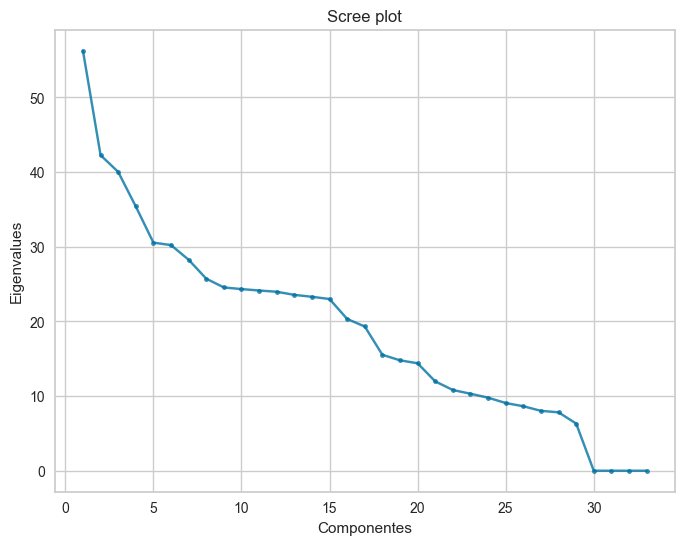

In [245]:
myPCA = PCA().fit(car_std[car_std.columns])

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

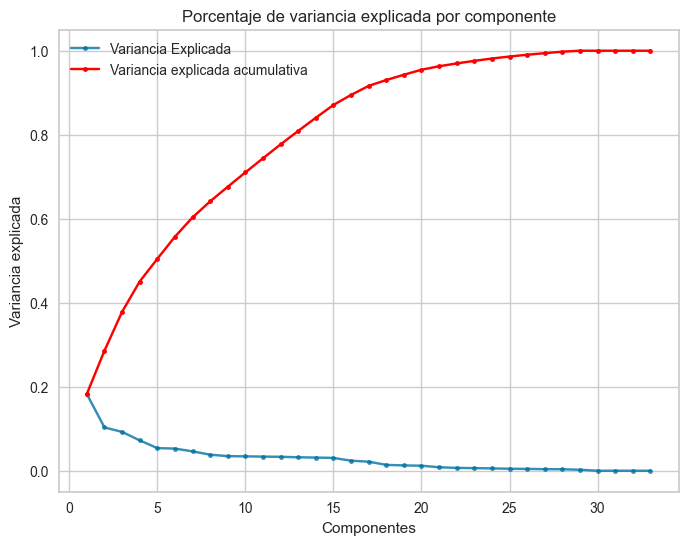

In [246]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

En la grafica podemos ver que para alcanzar un 80% de la varianza necesitamos al rededor de 15 componentes principales. Eso ya nos dice que el dataset es bastante complejo y no se puede reducir mucho sin perder demasiada informacion.

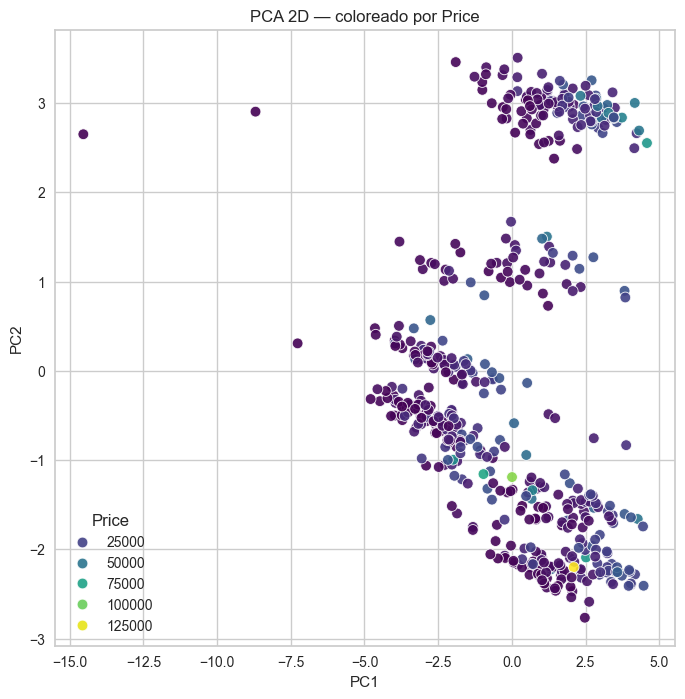

In [247]:
transformed_car = myPCA.transform(car_std[car_std.columns])
car_std[['PC1', 'PC2', 'PC3']] = transformed_car[:,:3]
car_std['Price'] = car_train['Price'].values

# Scatter usando Price como hue (o crear bins si prefieres categorías)
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue='Price', data=car_std, palette='viridis', s=60, alpha=0.9)
plt.title('PCA 2D — coloreado por Price')
plt.grid(True)
plt.show()

Como ya mencionamos antes, el dataset es bastante complejo y no se puede reducir mucho sin perder demasiada informacion y el grafico de PCA no muestra una clara separacion entre los diferentes precios de los coches. Entonces llegamos a la conclusion de que PCA no es una tecnica adecuada para este dataset.

---

b)  Transforma las variables adecuadamente para poder ajustar un modelo de regresión tanto
 el conjunto de entrenamiento como el de test. Ajusta un modelo de regresión lineal para
 predecir la variable objetivo y estima la calidad de la regresión. ¿Te parece suficientemente
 bueno el resultado? Analiza los pesos de los modelos. Representa los residuos y comenta
 qué aparece.

In [248]:
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor.alphas import alphas
from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats

Para aplicar la regresion linea, primero tenemos que separar la variable objetivo (price) del resto de variables. Vamos a crear una funcion para aplicar el preprocesamiento que hemos hecho antes y asi poder aplicarlo tanto al conjunto de entrenamiento como al de test.

In [249]:
def preprocessing(X,y,scaler=None, imputer=None):
    """
    X es el conjunto sin la variable respuesta
    y es la variable respuesta
    """
    X = X.copy()
    
    categorical_columns = X.dtypes[X.dtypes == 'category'].index.values
    numerical_columns = [c for c in X.columns if c not in categorical_columns]
    
    if scaler is None:
        scaler = StandardScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else:
        X[numerical_columns] = scaler.transform(X[numerical_columns])
        
    # Primero eliminamos las variables categoricas con One-Hot encoding
    X = pd.get_dummies(X, columns=categorical_columns, prefix=categorical_columns, dtype=int)
    
    # Ahora vamos a tratar los missing values usando un KNN 
    if imputer is None:   
        imputer = KNNImputer(n_neighbors=10)
        X_imp = imputer.fit_transform(X)
    else:
        X_imp = imputer.transform(X)

    X = pd.DataFrame(X_imp, columns=X.columns, index=X.index)
    
    return X, y, scaler, imputer
        
    

In [268]:
X = car_sales.loc[:, car_sales.columns != 'Price']

y = car_sales['Price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train, y_train, scaler, imputer = preprocessing(X_train, y_train)
X_test, y_test, _, _ = preprocessing(X_test, y_test, scaler, imputer)

Una vez tenemos los datos preprocesados, vamos a ajustar un modelo de regresión lineal para predecir el precio de los coches.

In [251]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [252]:
weights = lr.coef_
intercept = lr.intercept_

print('Coeficientes: \n', weights)
print('Interceptor: \n', intercept)

Coeficientes: 
 [ 7.87385242e+02  7.50286104e+03 -3.10846440e+03 -2.25012626e+03
 -3.99239654e+02  3.41480826e+03  1.33629107e+01 -1.84895104e+02
  2.73180029e+02  1.87921837e+03 -1.52468763e+03  6.41074346e+02
 -1.09348310e+03  3.04249958e+03 -5.10609324e+03  9.40041372e+03
 -2.33901039e+03 -4.99780967e+03 -1.06766072e+04  2.91851813e+04
 -9.10816040e+03 -4.10196864e+03  3.39062769e+01 -2.14556492e+03
  1.73991931e+04 -1.03803087e+03 -2.26641668e+02 -2.62560309e+03
 -1.23561944e+03  3.02539795e+03 -6.90011968e+03 -4.12878890e+03
 -7.45657389e+03 -1.21658556e+02  2.57926157e+02 -1.36267601e+02]
Interceptor: 
 17826.059449470864


In [253]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     55.88
Date:                Sun, 19 Oct 2025   Prob (F-statistic):          2.75e-136
Time:                        10:08:46   Log-Likelihood:                -5440.0
No. Observations:                 525   AIC:                         1.094e+04
Df Residuals:                     495   BIC:                         1.107e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.114e+04    512.032     21.759      0.000    1.01e+04    1.21e+04
Engine size            787.3852    765.708      1.028      0.304    -717.054    2291.825
Year of manufacture   7502.8610    644.027     11.650      0.000    6237.498    8768.224
Mileage              -3108.4644    612.684     -5.074      0.000   -4312.246   -1904.683
Inspection rating    -2250.1263    499.639     -4.504      0.000   -3231.800   -1268.452
Tires quality         -399.2397    427.837     -0.933      0.351   -1239.840     441.360
Interior condition    3414.8083    584.957      5.838      0.000    2265.503    4564.114
Comfort level           13.3629    533.273      0.025      0.980   -1034.395    1061.121
Sound system quality  -184.8951   1260.046     -0.147      0.883   -2660.593    2290.803
Model reviews score    273.1800    757.922      0.360      0.719   -1215.960    1762.320
Overall rating        1879.2184    781.178      2.406      0.017     344.385    3414.052
Independent rating   -1524.6876    749.082     -2.035      0.042   -2996.461     -52.914
Insurance cost         641.0743    390.718      1.641      0.101    -126.596    1408.745
Maintenance cost     -1093.4831    698.185     -1.566      0.118   -2465.255     278.289
Manufacturer_BMW      5270.7570   1616.190      3.261      0.001    2095.319    8446.195
Manufacturer_Ford    -2877.8358    989.259     -2.909      0.004   -4821.500    -934.172
Manufacturer_Porsche  1.163e+04   1556.867      7.469      0.000    8569.790    1.47e+04
Manufacturer_Toyota   -110.7530   1135.856     -0.098      0.922   -2342.447    2120.941
Manufacturer_VW      -2769.5522   1256.783     -2.204      0.028   -5238.839    -300.266
Model_718 Cayman     -9933.8547   2773.981     -3.581      0.000   -1.54e+04   -4483.625
Model_911             2.993e+04   3639.813      8.222      0.000    2.28e+04    3.71e+04
Model_Cayenne        -8365.4079   2423.816     -3.451      0.001   -1.31e+04   -3603.172
Model_Fiesta         -3359.2162   1200.642     -2.798      0.005   -5718.199   -1000.233
Model_Focus            776.6588    960.577      0.809      0.419   -1110.653    2663.971
Model_Golf           -1402.8124    984.751     -1.425      0.155   -3337.620     531.995
Model_M5              1.814e+04   2700.983      6.717      0.000    1.28e+04    2.34e+04
Model_Mondeo          -295.2784   1092.665     -0.270      0.787   -2442.112    1851.555
Model_Passat           516.1108   1159.109      0.445      0.656   -1761.270    2793.491
Model_Polo           -1882.8506   1035.504     -1.818      0.070   -3917.375     151.674
Model_Prius           -492.8670   1149.258     -0.429      0.668   -2750.892    1765.158
Model_RAV4            3768.1504   1142.590      3.298      0.001    1523.226    6013.075
Model_X3             -6157.3672   1896.435     -3.247    

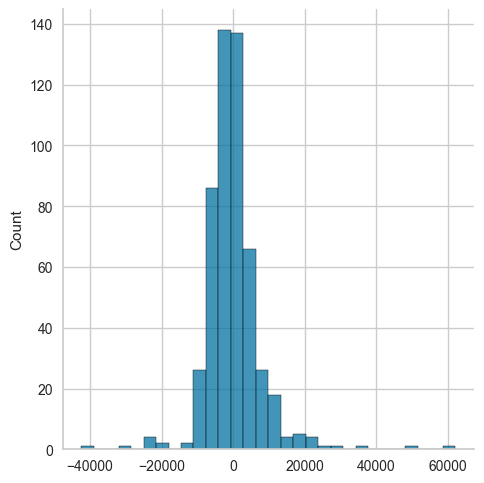

In [254]:
sns.displot(result.resid, bins=30)

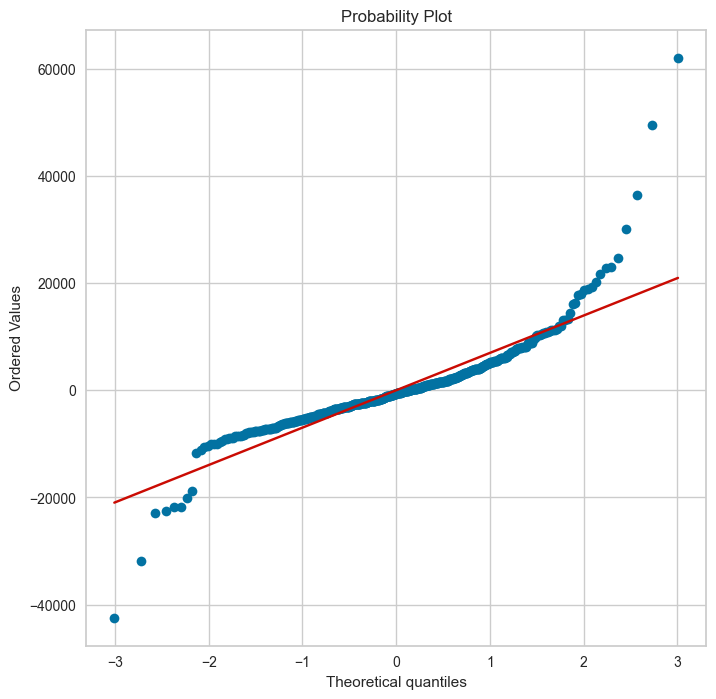

In [255]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid, plot=plt);

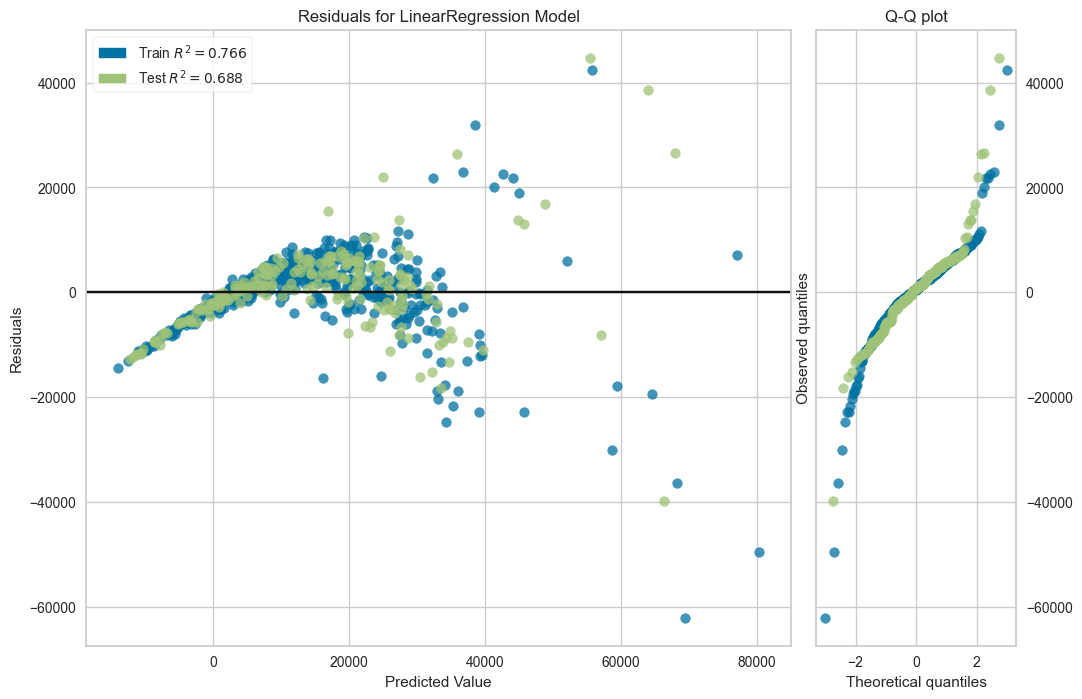

In [256]:
from yellowbrick.regressor import residuals_plot

# Grafica con los residuos del entrenamiento y el test con el qqplot o histograma
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

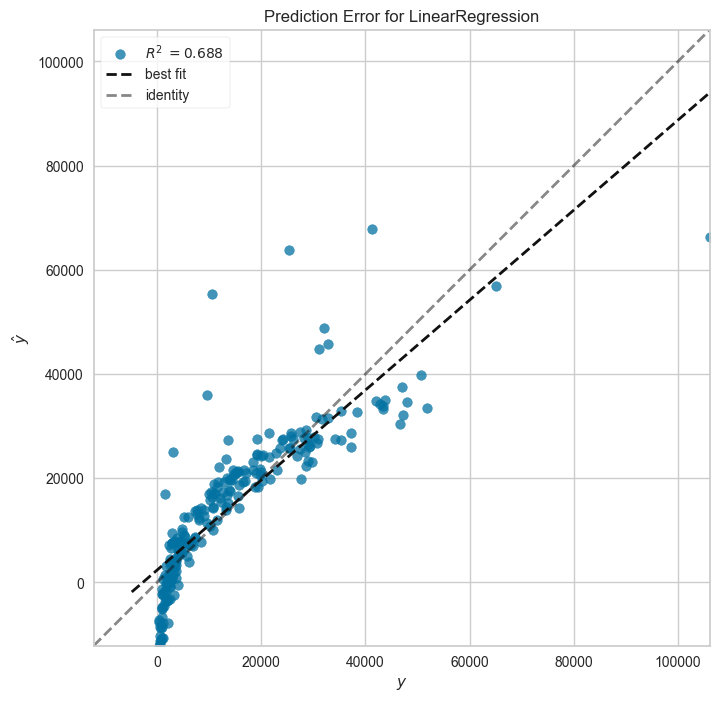

In [257]:
from yellowbrick.regressor import prediction_error

# Representar las predicciones en respecto a los valores reales
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

El modelo de Regresión Lineal tiene un rendimiento aceptable (R2 de 0.735), pero presenta violaciones significativas de las asunciones clave. Específicamente, se observa heterocedasticidad (los errores aumentan con los valores predichos) y una falta de normalidad en los residuos, con evidencia de sesgo y valores atípicos.

In [258]:
prediction = result.predict((sm.add_constant(X_train)))
N = X_train.shape[0]

# Normalized MSE
norm_mse = 1-r2_score(y_train, prediction)

# R^2
R_squared = r2_score(y_train, prediction)

# MAE
mae = mean_absolute_error(y_train, prediction)
print('Normalized MSE: \n', norm_mse)
print('R^2: \n', R_squared)
print('MAE: \n', mae)

Normalized MSE: 
 0.23399020558118322
R^2: 
 0.7660097944188168
MAE: 
 4856.047187707566


In [259]:
y.mean()

np.float64(13472.028)

Por las metricas que podemos evaluar, vemos que tanto el R2 como el Normalised MSE son buenos, por lo que podemos decir que el modelo es decente. Aun que en el MAE nos da un valor de 5105. Esto quiere decir que de media, el modelo se equivoca en 5105 dolares al predecir el precio de un coche. Teniendo en cuenta que la media del precio de los coches es de 13.472 dolares, esto supone un error del 37.8%. Por lo que podemos decir que el modelo no es tan bueno como parecia a simple vista.

In [260]:
lr = LinearRegression().fit(X_train, y_train)
folds_r2 = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
lr_r2 = np.mean(folds_r2)
folds_r2, lr_r2

(array([0.66812107, 0.51816539, 0.61971811, 0.80229475, 0.67613411]),
 np.float64(0.6568866860439415))

Ahora al hacer la cross-validation, podemos ver que el modelo no es muy estable, ya que el R2 varia mucho entre los diferentes folds. Esto nos indica que el modelo no generaliza bien y que probablemente este sobreajustado a los datos de entrenamiento.

---

c) Ajusta regresiones Ridge y LASSO a los datos. Analiza la diferencia de pesos entre la
 regresión lineal y Ridge. Analiza los pesos de LASSO y comenta qué variables han desaparecido de la regresión. ¿Tienen sentido las variables con mayor y menor peso para la
 predicción del precio? O lo que es lo mismo, ¿se podría explicar en función de lo que
 considera el modelo importante por qué se da un precio a un coche?

Primero vamos a ajustar una regresion Ridge a los datos. Para ello, vamos a usar la clase Ridge de scikit-learn. Vamos a usar cross-validation para encontrar el mejor valor de alpha.

In [261]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]
ridge_cv = RidgeCV(alphas=lambdas,cv=5).fit(X_train,y_train)
print(f'Mejor lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Mejor lambda: 0.0001 R2 score: 0.657


In [262]:
lasso_cv = LassoCV(alphas=lambdas,cv=5, max_iter=2000).fit(X_train,y_train)
lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_train,y_train))
print('Mejor lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

Mejor lambda: 0.0001 R2 score: 0.6557600313917162


Ahora vamos a analizar los pesos del modelo.

In [263]:
r2_results = pd.DataFrame({'lr':lr_r2, 'ridge_cv':ridge_cv.best_score_, 'lasso_cv':lasso_r2},index=['CV R2'])

r2_results.loc['Test R2', :] =[r2_score(y_test,lr.predict(X_test)),
                                r2_score(y_test,ridge_cv.predict(X_test)),
                                r2_score(y_test,lasso_cv.predict(X_test))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge_cv']=ridge_cv.alpha_
r2_results.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results

,lr,ridge_cv,lasso_cv
CV R2,0.656887,0.656886,0.655760
Test R2,0.688432,0.688438,0.688432
lambda,0.000000,0.000100,0.000100


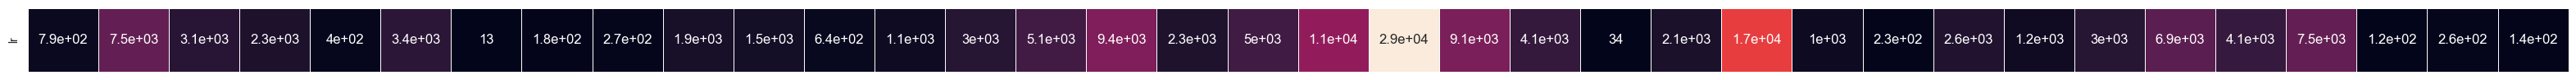

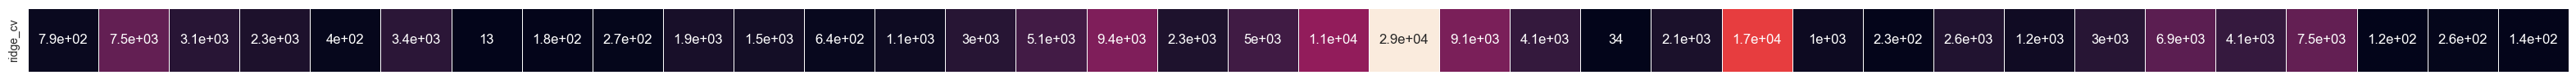

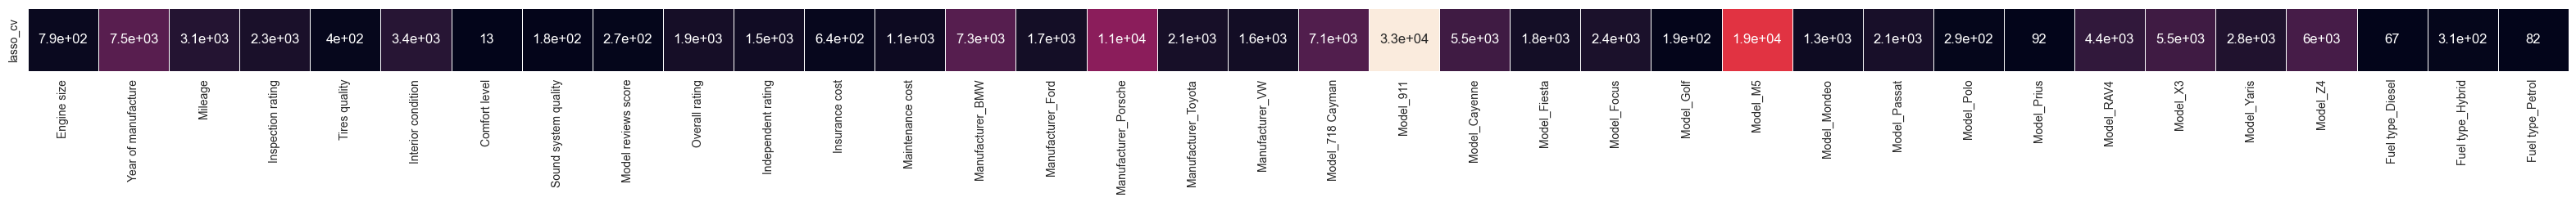

In [264]:
weights = pd.DataFrame({'lr':lr.coef_, 'ridge_cv':ridge_cv.coef_, 'lasso_cv':lasso_cv.coef_},index=X_train.columns)
fig,  ax = plt.subplots( figsize = (40,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False);

plt.figure(figsize = (40,1));
sns.heatmap(weights.T.loc[['ridge_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (40,1));
sns.heatmap(weights.T.loc[['lasso_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);

Las variables que han desaparecido en la regresion LASSO son las siguientes:

In [265]:
zero_features = weights[weights['lasso_cv'] == 0].index.tolist()
print(len(zero_features), "features eliminadas:")
print(zero_features)

0 features eliminadas:
[]


Como podemos ver en la lista, hay algunas variables que tienen sentido que hayan desaparecido como "Model reviews score", "Sound system quality" o si es diesel o gasolina. Pero hay otras que no tienen tanto sentido como "Manufacturer_Porsche", "Model_Cayenne" o "Manufacturer BMW" que son marcas de automóviles que normalmente tienen un precio superior a la media. Los demas modelos que aparecen si que son un poco mas irrelevantes, ya que todos ronda el mismo rango de precios.

---

d) Habrás observado algo bastante particular en los residuos de los modelos. Podemos intentar arreglarlo introduciendo interacciones entre las variables. Usa la función PolynomialFeatures de scikit-learn para añadir al conjunto de datos original características que correspondan a polinomios de grado 2. Vuelve a ajustar la regresión Ridge y la regresión LASSO. ¿Han mejorado los modelos? ¿Se ha arreglado el problema con los residuos? ¿Como de simple es el modelo LASSO?

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils._testing import ignore_warnings

lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]
# Arreglo para que no salgan los warnings de convergencia
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ConvergenceWarning)
    ridge_cv_poly = RidgeCV(alphas=lambdas,cv=5).fit(X_train_poly,y_train)
    
    lasso_cv_poly = LassoCV(alphas=lambdas, cv=5).fit(X_train_poly, y_train)
    lasso_r2_poly =  np.mean(cross_val_score(lasso_cv, X_train_poly,y_train))
    
print(f'Mejor lambda Ridge: {ridge_cv_poly.alpha_} R2 score: {ridge_cv_poly.best_score_:3.3f}')

print('Mejor lambda LASSO:', lasso_cv_poly.alpha_, 'R2 score:',lasso_r2_poly)



Mejor lambda Ridge: 1.0 R2 score: 0.936
Mejor lambda LASSO: 10.0 R2 score: 0.908244964922438


Como se puede ver en los resultados, al añadir las interacciones entre las variables, el rendimiento de ambos modelos ha mejorado significativamente. El modelo Ridge ha pasado de un R2 de 0.745 a 0.936 y el modelo LASSO ha pasado de un R2 de 0.754 a 0.908.

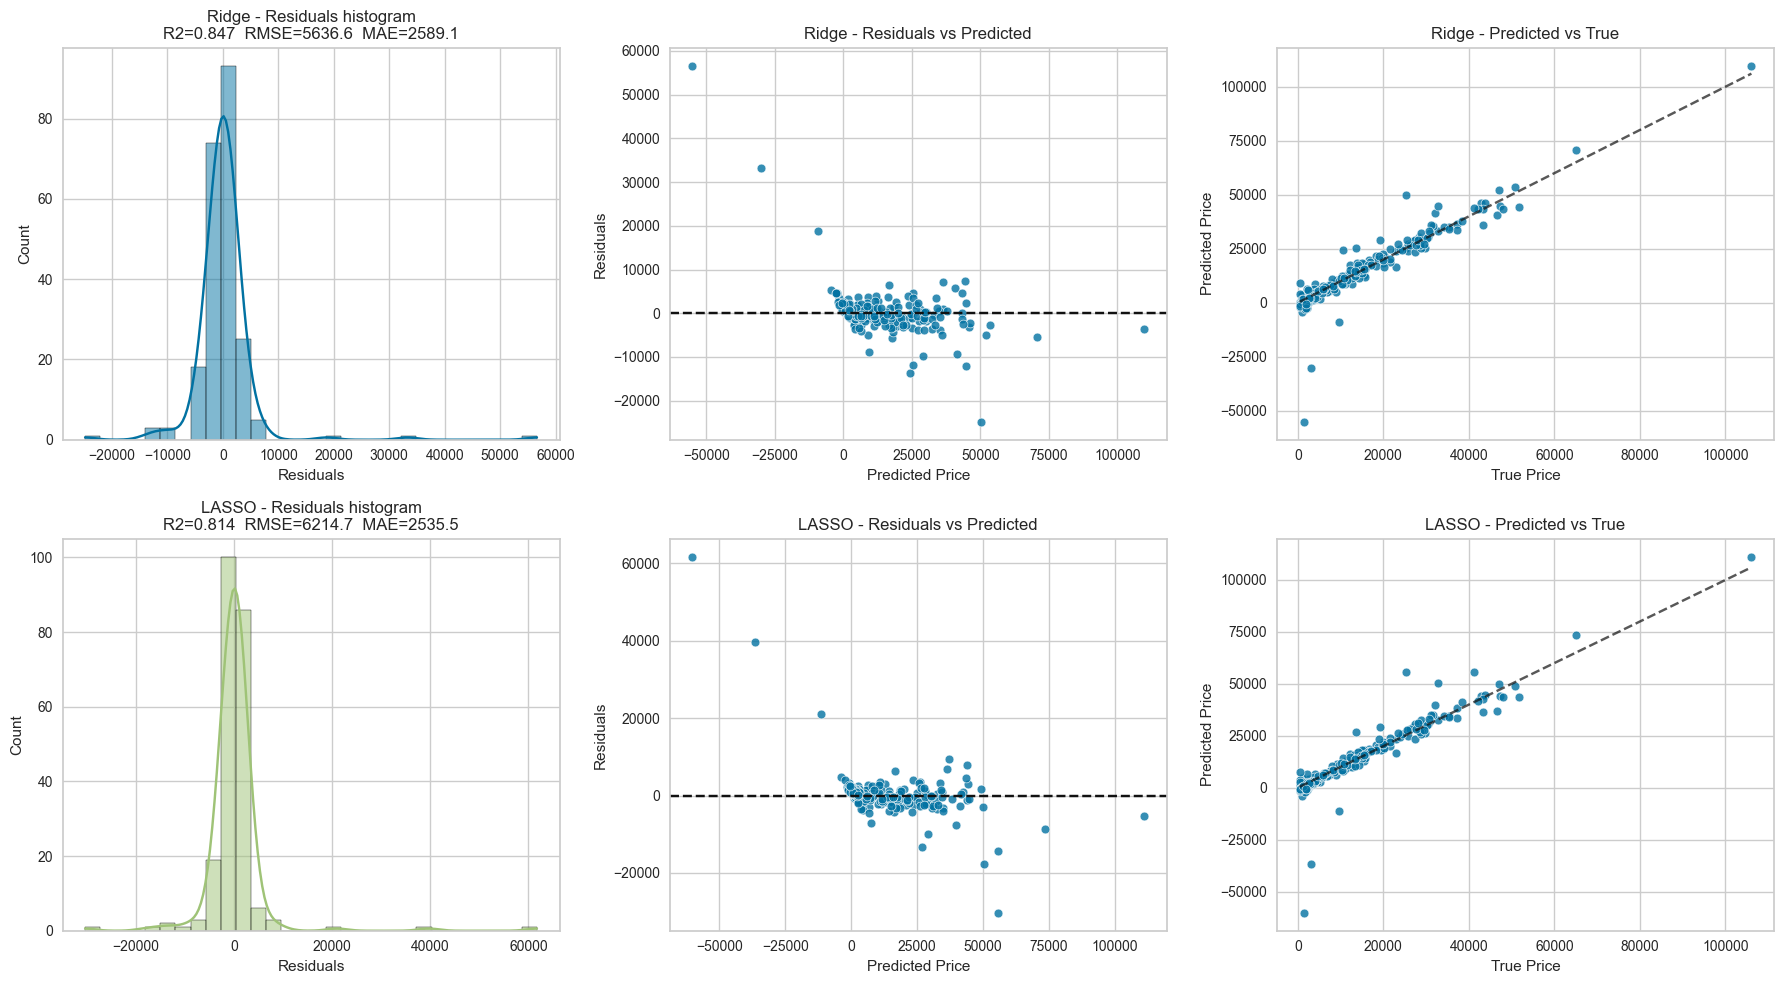

LASSO: coeficientes no nulos = 36 / 36 (100.0% activos)


In [267]:
y_pred_ridge = ridge_cv_poly.predict(X_test_poly)
res_ridge = y_test - y_pred_ridge

y_pred_lasso = lasso_cv_poly.predict(X_test_poly)
res_lasso = y_test - y_pred_lasso

def metrics_str(y_true, y_pred):
    return f"R2={r2_score(y_true,y_pred):.3f}  RMSE={np.sqrt(mean_squared_error(y_true,y_pred)):.1f}  MAE={mean_absolute_error(y_true,y_pred):.1f}"

met_ridge = metrics_str(y_test, y_pred_ridge)
met_lasso = metrics_str(y_test, y_pred_lasso)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Ridge: histograma
sns.histplot(res_ridge, bins=30, kde=True, ax=axes[0,0], color='C0')
axes[0,0].set_title(f'Ridge - Residuals histogram\n{met_ridge}')
axes[0,0].set_xlabel('Residuals')

# Ridge: Residuals vs Predicho
sns.scatterplot(x=y_pred_ridge, y=res_ridge, ax=axes[0,1], s=40, alpha=0.8)
axes[0,1].axhline(0, color='k', linestyle='--')
axes[0,1].set_xlabel('Predicted Price')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Ridge - Residuals vs Predicted')

# Ridge: Predicho vs Real
sns.scatterplot(x=y_test, y=y_pred_ridge, ax=axes[0,2], s=40, alpha=0.8)
axes[0,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', alpha=0.7)
axes[0,2].set_xlabel('True Price')
axes[0,2].set_ylabel('Predicted Price')
axes[0,2].set_title('Ridge - Predicted vs True')

# Lasso: histograma
sns.histplot(res_lasso, bins=30, kde=True, ax=axes[1,0], color='C1')
axes[1,0].set_title(f'LASSO - Residuals histogram\n{met_lasso}')
axes[1,0].set_xlabel('Residuals')

# Lasso: Residuals vs Predicho
sns.scatterplot(x=y_pred_lasso, y=res_lasso, ax=axes[1,1], s=40, alpha=0.8)
axes[1,1].axhline(0, color='k', linestyle='--')
axes[1,1].set_xlabel('Predicted Price')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('LASSO - Residuals vs Predicted')

# Lasso: Predicho vs Real
sns.scatterplot(x=y_test, y=y_pred_lasso, ax=axes[1,2], s=40, alpha=0.8)
axes[1,2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', alpha=0.7)
axes[1,2].set_xlabel('True Price')
axes[1,2].set_ylabel('Predicted Price')
axes[1,2].set_title('LASSO - Predicted vs True')

plt.tight_layout()
plt.show()

coefs = pd.Series(lasso_cv.coef_, index=[f'feat_{i}' for i in range(len(lasso_cv.coef_))])
nonzero = (coefs != 0).sum()
total = len(coefs)
print(f'LASSO: coeficientes no nulos = {nonzero} / {total} ({nonzero/total:.1%} activos)')